<a href="https://colab.research.google.com/github/BrianKowalski/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Титаник
Описание данных:

1. PassengerId - айди пассажира
2. Survived - выжил ли (1 = да, 0 = нет)
3. Pclass - класс билета (1 = первый, 2 = средний, 3 = эконом)
4. Name	- имя и фамилия пассажира
5. Sex - пол пассажира
6. Age - возраст пассажира
7. SibSp - количество братьев, сестер и супруга на борту
8. Parch - количество родителей и детей на борту
9. Ticket - номер билета
10. Fare - стоимость билета
11. Cabin - номер каюты
12. Embarked - порт посадки (C = Cherbourg, Q = Queenstown, S = Southampton)


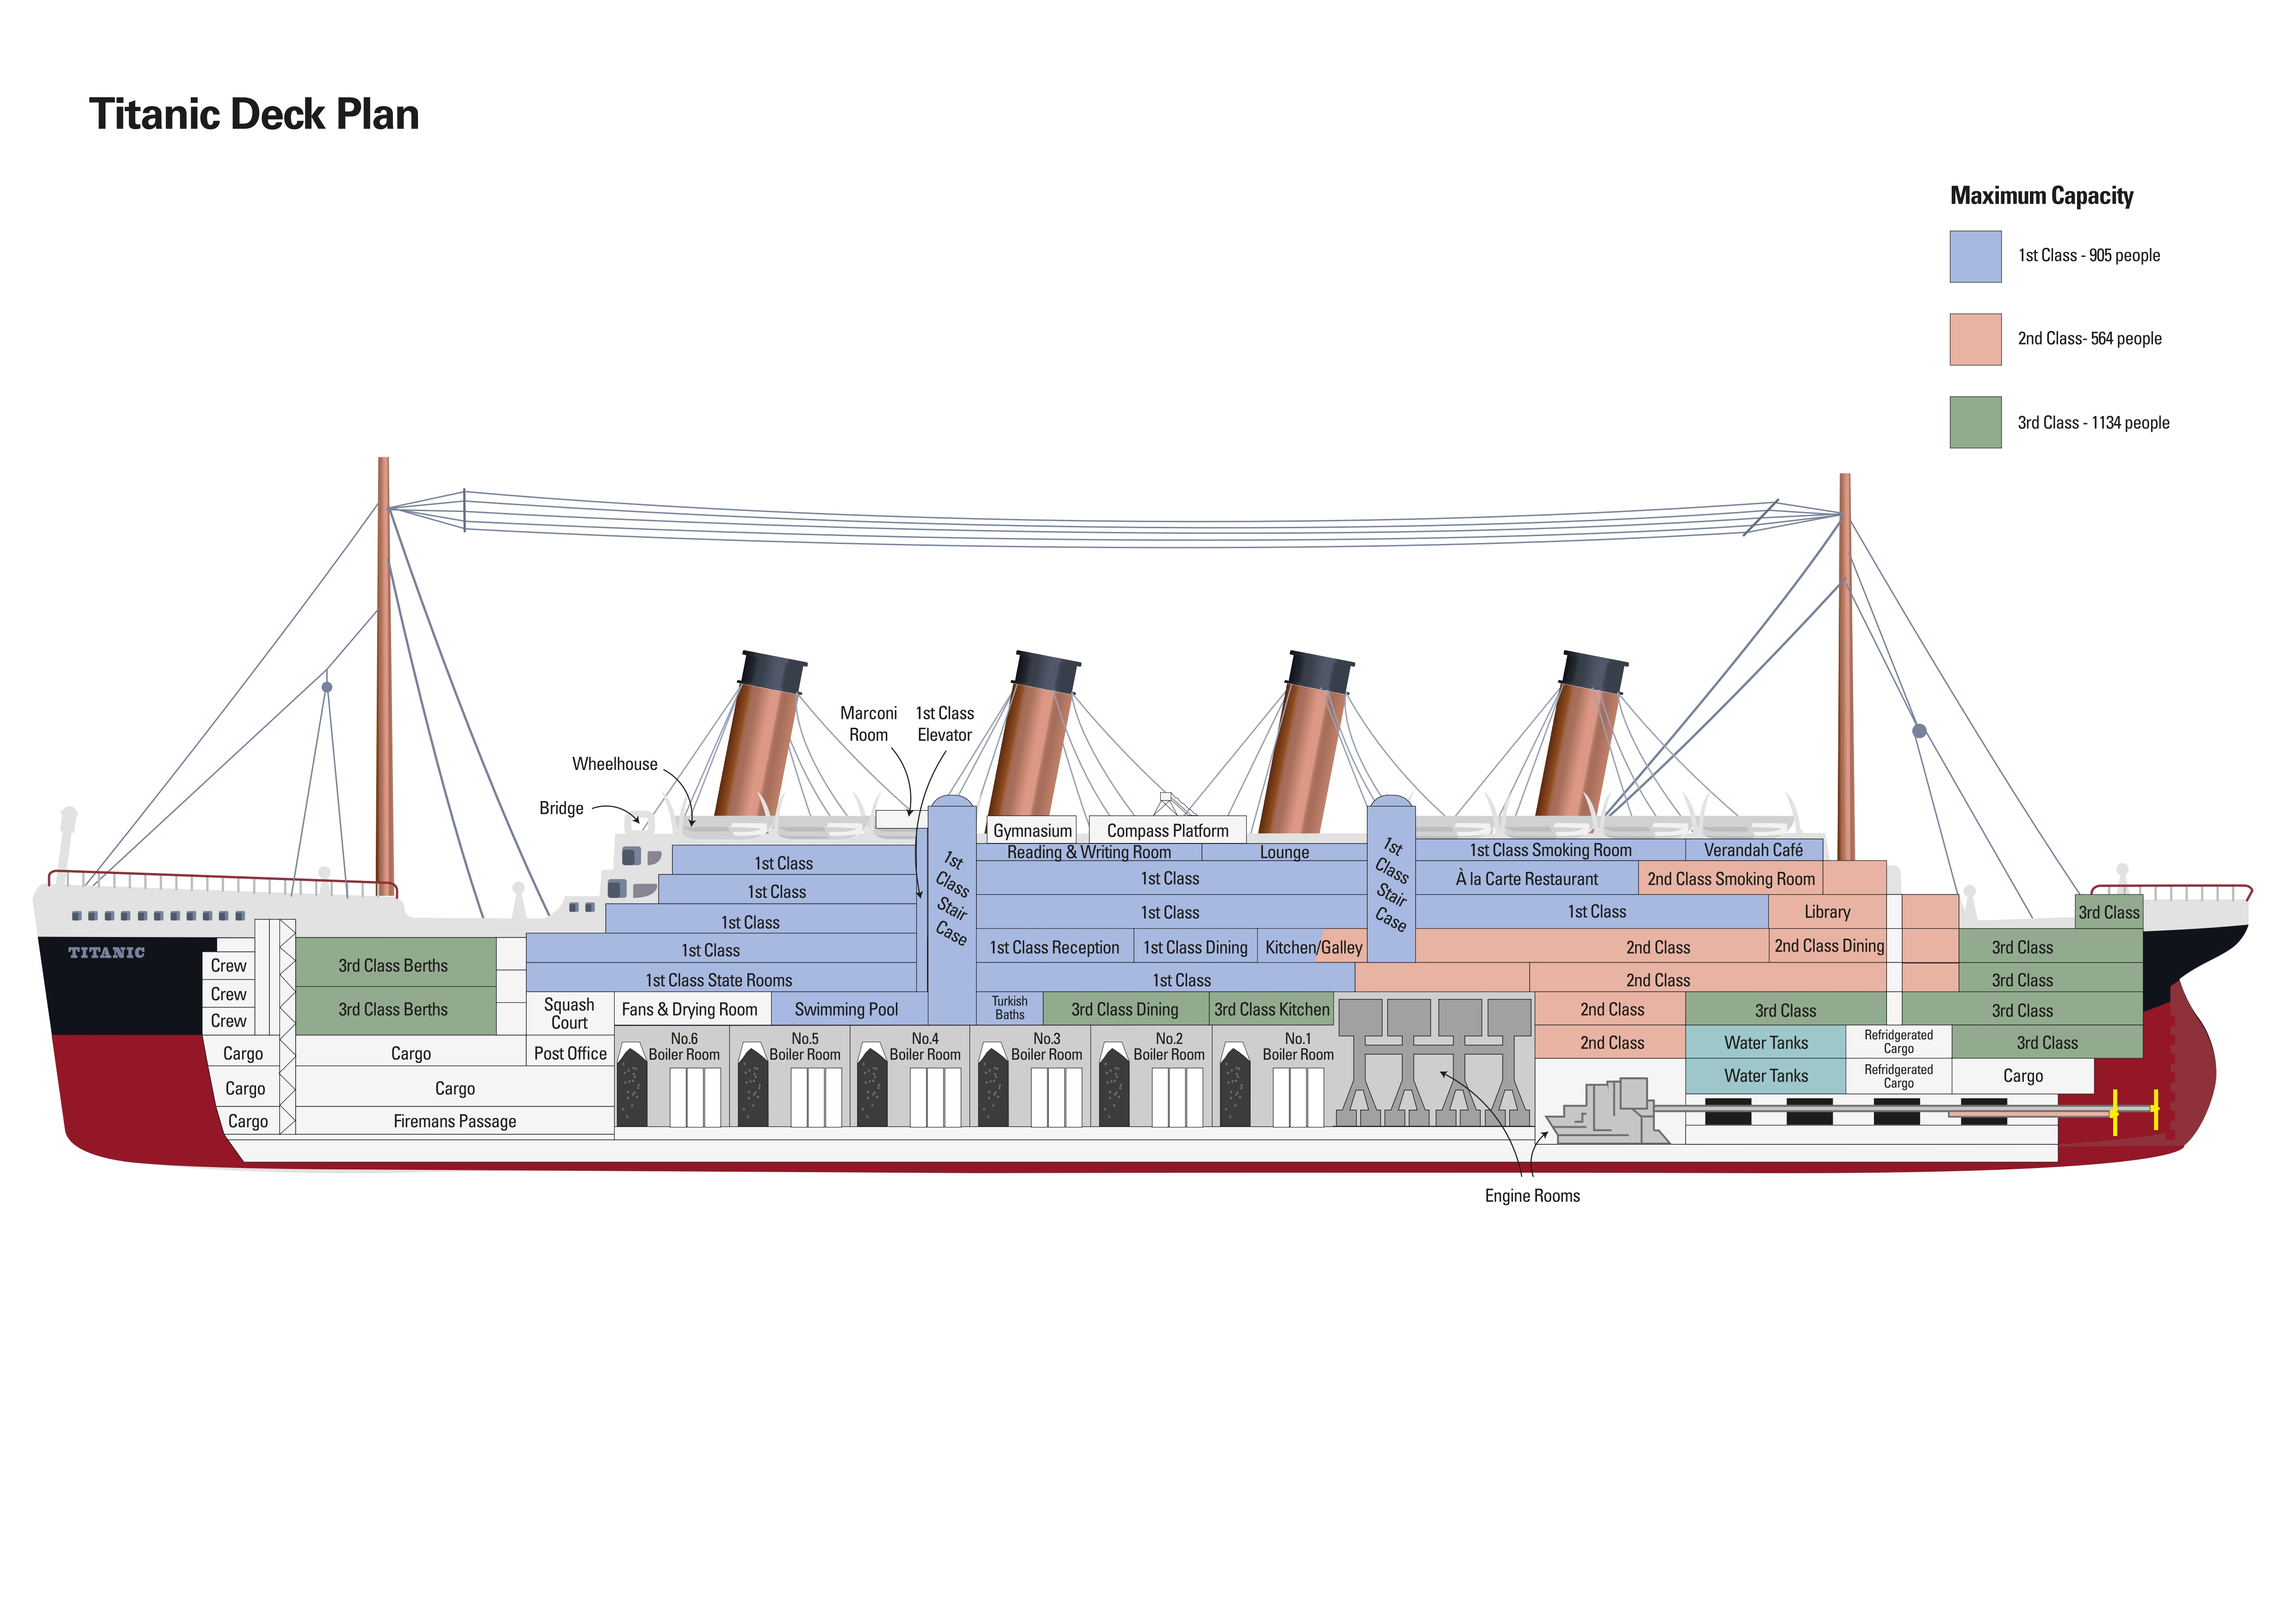

In [752]:
!pip install opendatasets --upgrade --quiet
!pip install seaborn
!pip install phik

In [753]:
import opendatasets as ods
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import phik

sns.set_style('whitegrid', {'grid.linestyle': '--'})

In [754]:
download_url = 'https://www.kaggle.com/competitions/titanic'
ods.download(download_url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [755]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

## Предварительный анализ данных

In [756]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [757]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [758]:
train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [759]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1. Survived

In [760]:
def countplot(title, x, y=None, hue=None):
  sns.countplot(data=train, x=x, hue=hue)
  plt.title(title)
  plt.show()

In [761]:
def boxplot(title, x, y=None, ylim=None, xlim=None, hue=None):
  sns.boxplot(data=train, x=x, y=y, hue=hue)
  plt.ylim(ylim)
  plt.xlim(xlim)
  plt.title(title)
  plt.show()

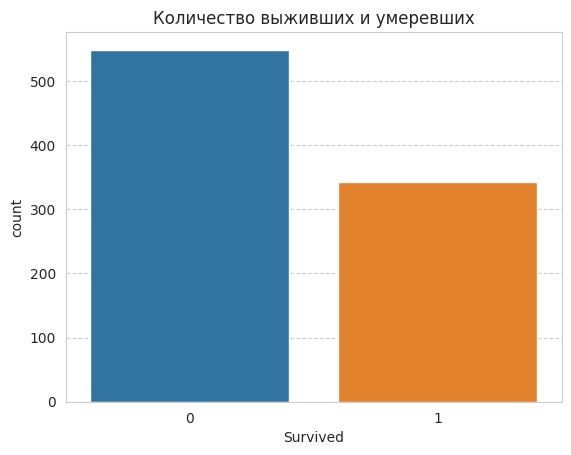

In [762]:
countplot('Количество выживших и умеревших', 'Survived')

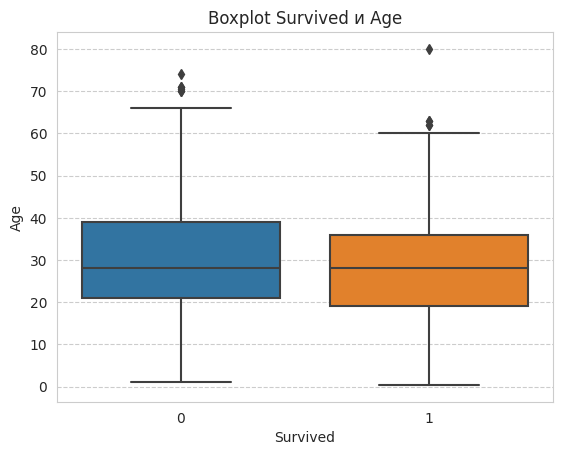

In [763]:
boxplot('Boxplot Survived и Age', x='Survived', y='Age')

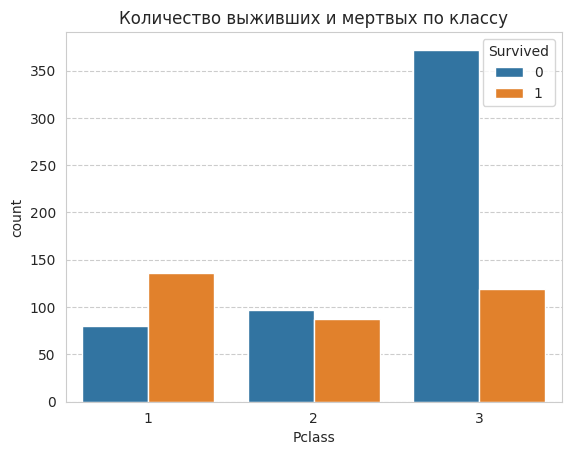

In [764]:
countplot('Количество выживших и мертвых по классу', x='Pclass', hue='Survived')

Ожидаемо, большая разница между мертвыми и живыми у эконом класса, у них не было рядом с каютами лестницы, которые выходили бы на спасательные шлюпки

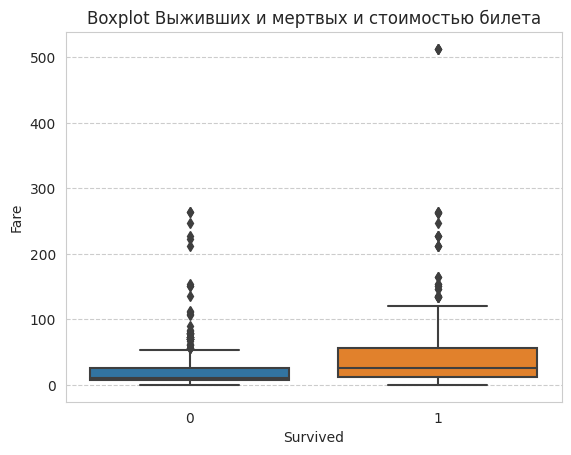

In [765]:
boxplot('Boxplot Выживших и мертвых и стоимостью билета', x='Survived', y='Fare')

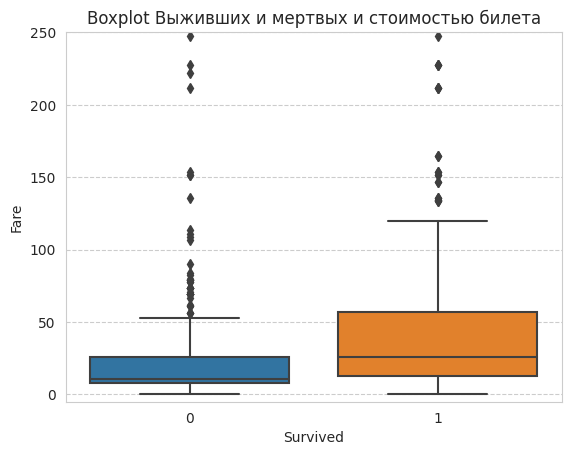

In [766]:
boxplot('Boxplot Выживших и мертвых и стоимостью билета', x='Survived', y='Fare', ylim=(-5,250))

In [767]:
len(train.query('Fare >= 250'))

9

Убрать все аномальные значения, у которых стоимость билета больше 250, и строку с возрастом около 80. Избавиться от дисбаланса классов при обучении

### 2. Pclass

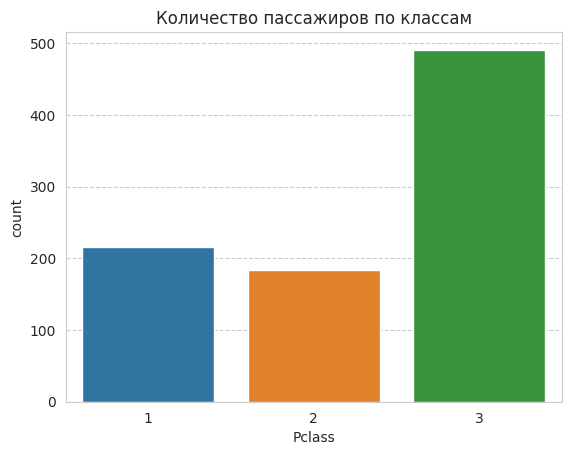

In [768]:
countplot('Количество пассажиров по классам', x='Pclass')

In [769]:
train.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Эконом класс примерно составляет 55% от всех пассажиров, средний - 20,6%, первый - 24,2%.

### 3. Age

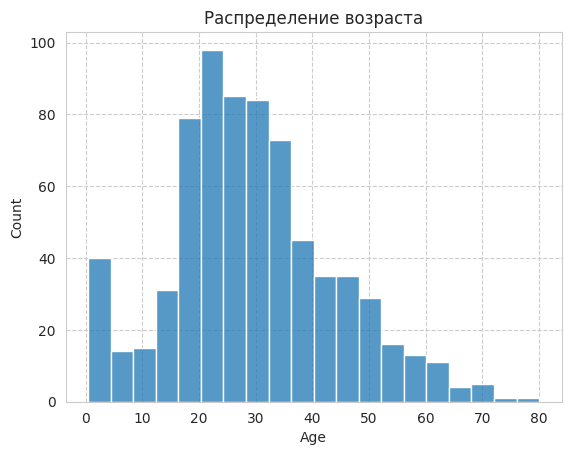

In [770]:
sns.histplot(data=train, x='Age')
plt.title('Распределение возраста')
plt.show()

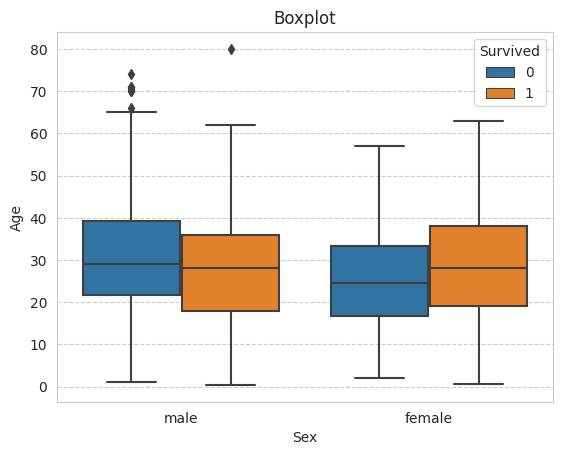

In [771]:
boxplot('Boxplot', x='Sex', y='Age', hue='Survived')

In [772]:
train.Age.isna().mean()

0.19865319865319866

In [773]:
print(train['Age'].mean(), train['Age'].median())

29.69911764705882 28.0


Больше всего молодежи и людей среднего возраста, большое количество детей малого возраста, имеется небольшой "хвост" из пожилых людей. Возраст надо округлить в меньшую сторону, тк совершеннолетние в Англии в начале 20 века у мужчин считался 21 год, у женщин - 25 лет.
Пропуски можно заполнить средним или медианой, особой разницы у них не наблюдается

### 4. SibSp

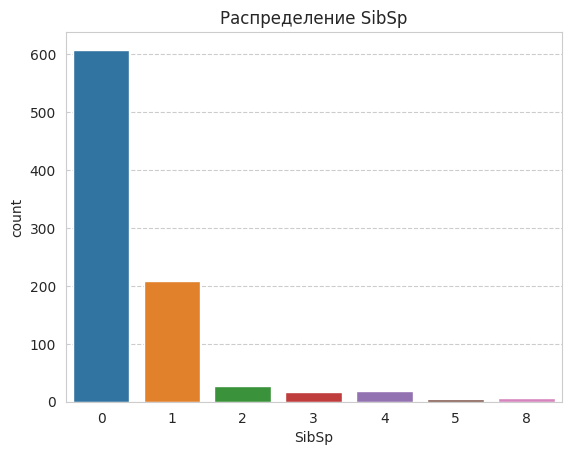

In [774]:
countplot('Распределение SibSp', x='SibSp')

In [775]:
train.SibSp.value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

У 68% у людей либо не было сестер/братьев/супруга на борту, у 23% были либо сестра, либо брат, либо супруг, у остальных - 2 и более.

### 5. Parch

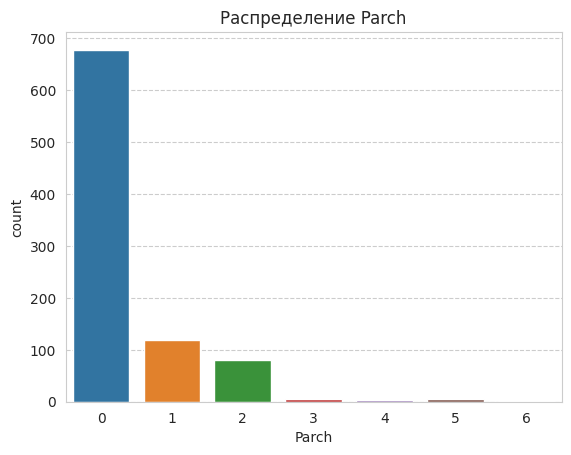

In [776]:
countplot('Распределение Parch', x='Parch')

In [777]:
train.Parch.value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

У 76% процентов пассажиров не было родителей или детей на борту, у 13% - по 1 человеку, у 8% - по 2, у остальных - 3 и более.

### 6. Fare

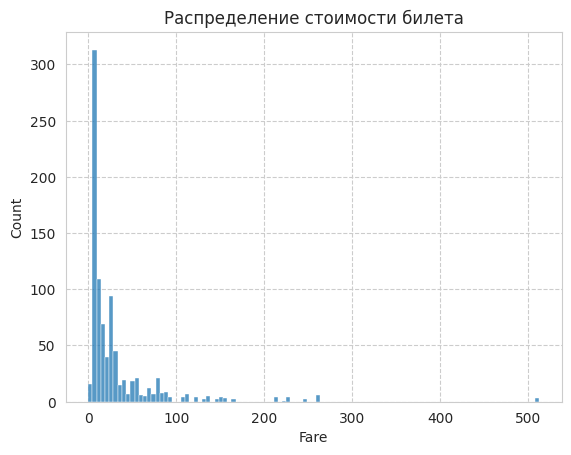

In [778]:
sns.histplot(data=train, x='Fare')
plt.title('Распределение стоимости билета')
plt.show()

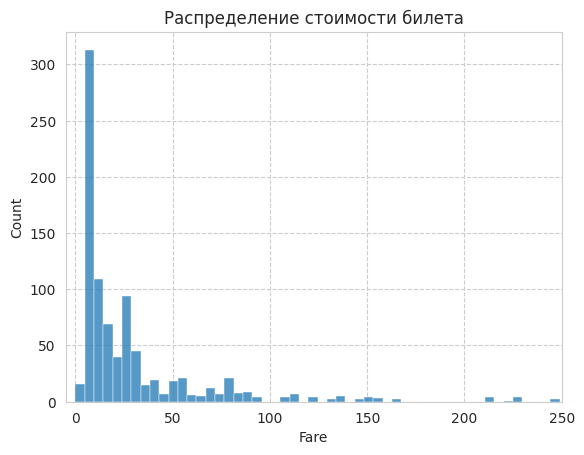

In [779]:
sns.histplot(data=train, x='Fare')
plt.xlim((-5, 250))
plt.title('Распределение стоимости билета')
plt.show()

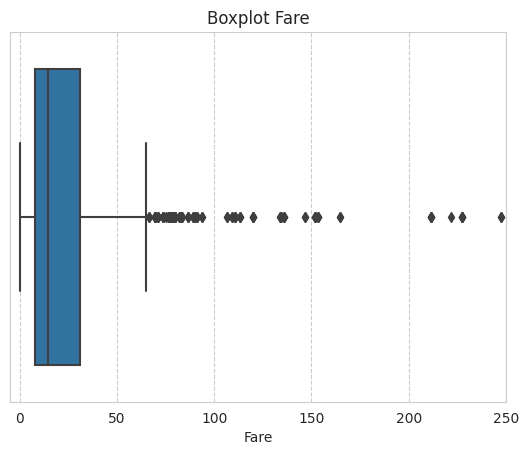

In [780]:
boxplot('Boxplot Fare', x='Fare', xlim=(-5, 250))

In [781]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Embarked

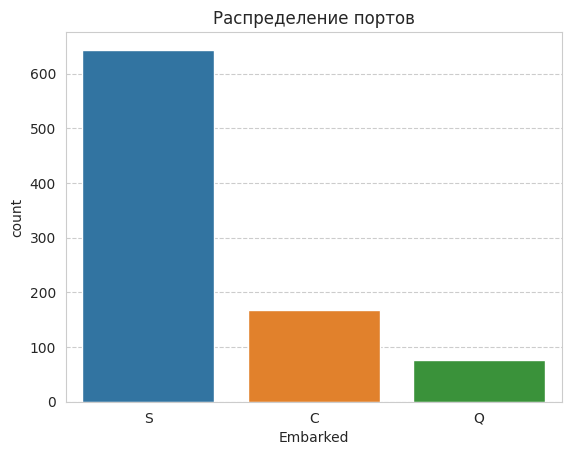

In [782]:
countplot('Распределение портов', x='Embarked')

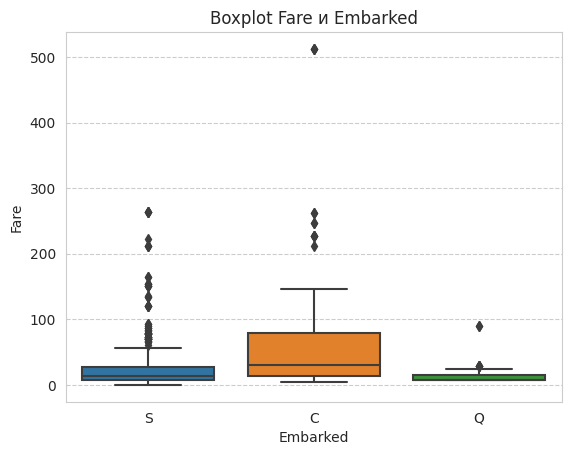

In [783]:
boxplot('Boxplot Fare и Embarked', y='Fare', x='Embarked')

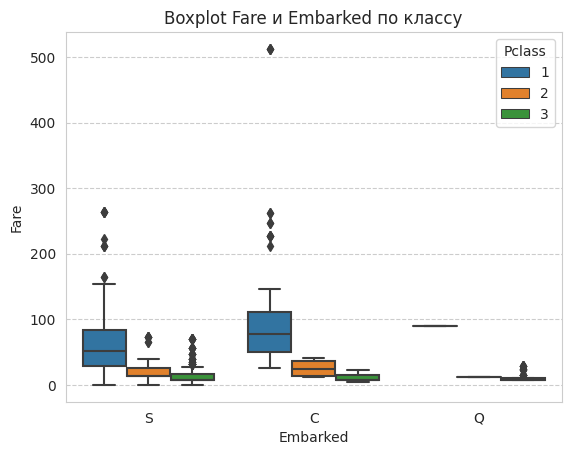

In [784]:
boxplot('Boxplot Fare и Embarked по классу', y='Fare', x='Embarked', hue='Pclass')

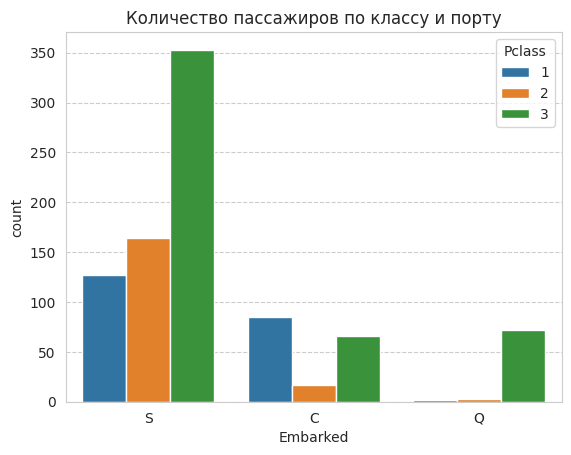

In [785]:
countplot('Количество пассажиров по классу и порту', x='Embarked', hue='Pclass')

In [786]:
train.Embarked.isna().mean()

0.002244668911335578

Заполнить пропуски в Embarked модой - S

### Вывод

- Поменять название признаков;
- Объединить Parch и SibSp;
- Удалить строку с возрастом около 80;
- Удалить строки, стоимость билета у которых более 250;
- Заполнить пропуски возраста медианой;
- Разделить номер кабины и номер палубы;
- Заполнить пропуски Embarked модой;
- Удалить признак Ticket.


## Предобработка

In [787]:
train.columns = ['passenger_id', 'survived', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']

In [788]:
train.head()

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [789]:
train.age.fillna(train.age.median(), inplace=True)
train = train.query('age < 80 & fare <= 250')

In [790]:
train

,passenger_id,survived,p_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [791]:
train = train.drop(['ticket', 'name'], axis=1)

In [792]:
train.set_index('passenger_id', inplace=True)

In [793]:
train.age.fillna(train.age.median(), inplace=True)
train.age = train.age.astype(int)

In [794]:
train

,survived,p_class,sex,age,sib_sp,parch,fare,cabin,embarked
passenger_id,,,,,,,,,
1,0,3,male,22,1,0,7.2500,NaN,S
2,1,1,female,38,1,0,71.2833,C85,C
3,1,3,female,26,0,0,7.9250,NaN,S
4,1,1,female,35,1,0,53.1000,C123,S
5,0,3,male,35,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27,0,0,13.0000,NaN,S
888,1,1,female,19,0,0,30.0000,B42,S
889,0,3,female,28,1,2,23.4500,NaN,S


In [795]:
train.embarked.fillna(train.embarked.mode()[0], inplace=True)

In [796]:
train.embarked.isna().mean()

0.0

In [797]:
train.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'B78', 'D33',
       'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12',
       'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47', 'B86', 'F2',
       'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4', 'B80', 'A31',
       'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77', 'E67', 'B94',
       'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D', 'C22 C26', 'C106',
       'C65', 'E36', 'C54', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91',
       'E40', 'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10',
       'E44', 'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63',
       'A14', 'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95',
       'B38', 'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10',
       'E68', 'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24', 'C90', 'C45', 'E8', 'D45', 'C46', 'D30', 'E121', 'D11',

In [798]:
def search_deck(x):
  flag = re.search('[A-Z]', x)
  if flag == None:
    return 'unknown'
  return flag.group()

In [799]:
train.cabin.fillna('unknown', inplace=True)
train['deck'] = train.cabin.apply(search_deck)
train['family'] = train.sib_sp + train.parch
train.drop(['cabin', 'sib_sp', 'parch'], axis=1, inplace=True)

In [800]:
train

,survived,p_class,sex,age,fare,embarked,deck,family
passenger_id,,,,,,,,
1,0,3,male,22,7.2500,S,unknown,1
2,1,1,female,38,71.2833,C,C,1
3,1,3,female,26,7.9250,S,unknown,0
4,1,1,female,35,53.1000,S,C,1
5,0,3,male,35,8.0500,S,unknown,0
...,...,...,...,...,...,...,...,...
887,0,2,male,27,13.0000,S,unknown,0
888,1,1,female,19,30.0000,S,B,0
889,0,3,female,28,23.4500,S,unknown,3


In [801]:
train.deck.unique()

array(['unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [802]:
train.survived = train.survived.astype('category')
train.p_class = train.p_class.astype('category')
train.sex = train.sex.astype('category')
train.embarked = train.embarked.astype('category')

In [803]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  881 non-null    category
 1   p_class   881 non-null    category
 2   sex       881 non-null    category
 3   age       881 non-null    int64   
 4   fare      881 non-null    float64 
 5   embarked  881 non-null    category
 6   deck      881 non-null    object  
 7   family    881 non-null    int64   
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 38.4+ KB


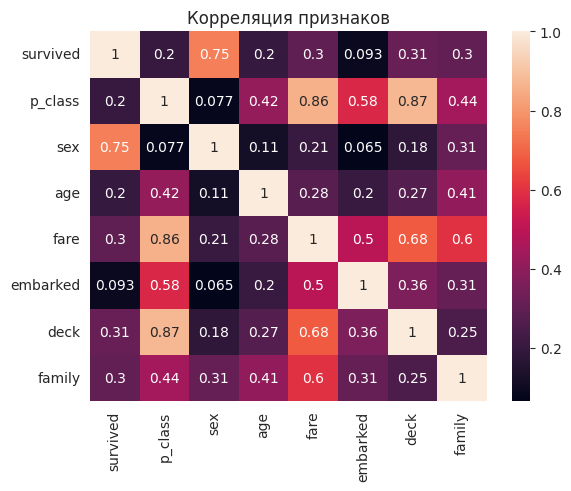

In [804]:
sns.heatmap(train.phik_matrix(interval_cols=['age', 'fare', 'family']), annot=True)
plt.title('Корреляция признаков')
plt.show()

Ожидаемая сильная корреляция между стоимостью билета и классом/номером палубы, чем престижнее каюта, тем она дороже. Также видна сильная корреляция между survived и полом пассажира, потому что первом делом спасали женщин и детей.

In [805]:
train_new = pd.DataFrame(train)
columns_dummy = ['sex', 'embarked', 'deck', 'p_class']

In [806]:
train_new = pd.get_dummies(train_new, columns=columns_dummy, drop_first=True)

In [807]:
train_new

,survived,age,fare,family,sex_male,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,deck_unknown,p_class_2,p_class_3
passenger_id,,,,,,,,,,,,,,,,,
1,0,22,7.2500,1,1,0,1,0,0,0,0,0,0,0,1,0,1
2,1,38,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,26,7.9250,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,1,35,53.1000,1,0,0,1,0,1,0,0,0,0,0,0,0,0
5,0,35,8.0500,0,1,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27,13.0000,0,1,0,1,0,0,0,0,0,0,0,1,1,0
888,1,19,30.0000,0,0,0,1,1,0,0,0,0,0,0,0,0,0
889,0,28,23.4500,3,0,0,1,0,0,0,0,0,0,0,1,0,1


In [808]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
